In [15]:
# Final Project – Advanced Machine Learning
## Amazon Reviews Sentiment Classification

In [16]:
## Definición del Problema

## El objetivo de este proyecto es predecir si una reseña de un producto de Amazon es positiva o negativa según su texto.

## Este problema es importante para las empresas porque el análisis de sentimientos ayuda a:
## - Mejorar los productos
## - Detectar la insatisfacción del cliente
## - Apoyar la toma de decisiones estratégicas

## Este es un problema de clasificación supervisada.

In [17]:
!pip install datasets

In [18]:
from datasets import load_dataset
import pandas as pd

dataset = load_dataset("amazon_polarity")

df = pd.DataFrame(dataset["train"])

df.head()

,label,title,content
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,1,Amazing!,This soundtrack is my favorite music of all ti...
3,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [ ]:
df.columns

In [ ]:
df["review_text"] = df["title"] + " " + df["content"]

In [ ]:
X = df["review_text"]
y = df["label"]

In [ ]:
df.head()
df.info()
df["label"].value_counts()

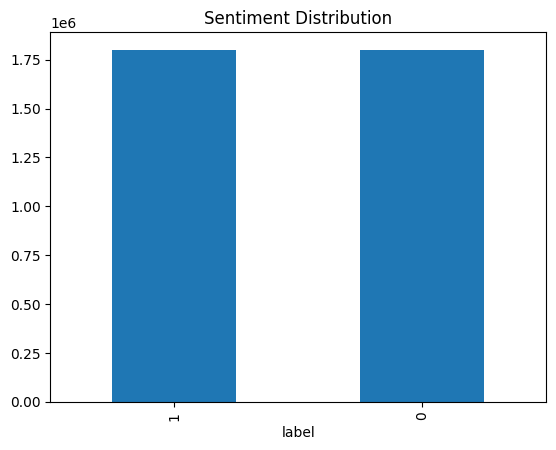

In [23]:
import matplotlib.pyplot as plt

df["label"].value_counts().plot(kind="bar")
plt.title("Sentiment Distribution")
plt.show()

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

X = df["review_text"]
y = df["label"]

vectorizer = TfidfVectorizer(max_features=5000)
X_vectorized = vectorizer.fit_transform(X)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized, y, test_size=0.2, random_state=42
)

In [25]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print("Logistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_lr))

print("Random Forest Accuracy:",
      accuracy_score(y_test, y_pred_rf))

In [ ]:
print(classification_report(y_test, y_pred_lr))